In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [2]:
br = yf.download(tickers='BRLUSD=X', period='1y', interval='1h')

[*********************100%***********************]  1 of 1 completed


In [3]:
#gold = yf.download(tickers='GC=F', period='2y', interval='1h')
#br = yf.download(tickers='BRLUSD=X', period='2y', interval='1h')
#silver = yf.download(tickers='SI=F', period='2y', interval='1h')
eur = yf.download(tickers='EURUSD=X', period='1y', interval='1h')
xrp = yf.download(tickers='XRP-USD', period='1y', interval='1h')
xlm = yf.download(tickers='XLM-USD', period='1y', interval='1h')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
solana = yf.download(tickers='SOL-USD', period='1y', interval='1h')
btc = yf.download(tickers='BTC-USD', period='1y', interval='1h')
#eth = yf.download(tickers='ETH-USD', period='2y', interval='1h')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
eth = yf.download(tickers='ETH-USD', period='1y', interval='1h')

[*********************100%***********************]  1 of 1 completed


In [6]:
master = pd.concat([br['Close'], eur['Close'], xrp['Close']
                    , xlm['Close'], solana['Close'], btc['Close'], eth['Close']], axis=1)
master.columns = ['br', 'eur', 'xrp', 'xlm', 'solana', 'btc', 'eth']


<AxesSubplot:ylabel='Datetime'>

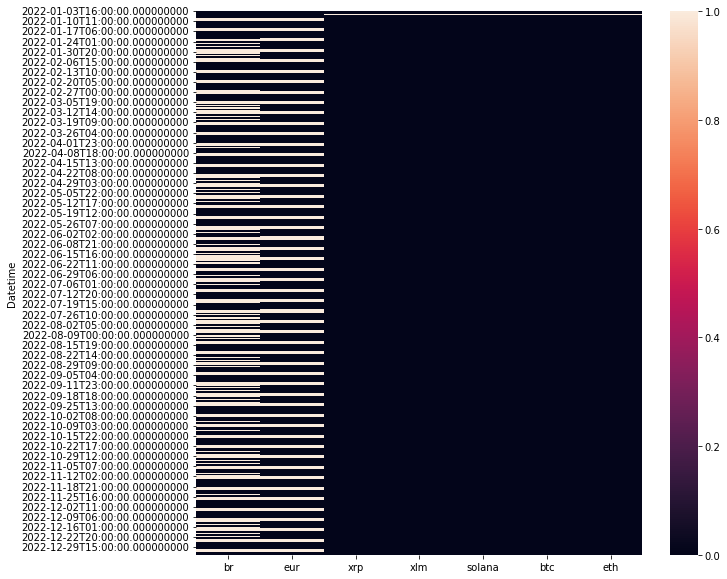

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(master.isna())

In [8]:
# Keep last 2 years
data = master.loc[(master.index.astype('str').str.startswith('2022')) |
                  (master.index.astype('str').str.startswith('2023'))][['xrp', 'xlm', 'solana', 'btc', 'eth']]

In [9]:
# Conversion to 4hrs
data_4h = data[(data.index.astype('str').str.slice(11,13).astype('int') == 1) | (data.index.astype('str').str.slice(11,13).astype('int') == 5)
    | (data.index.astype('str').str.slice(11,13).astype('int') == 9) | (data.index.astype('str').str.slice(11,13).astype('int') == 13) |
    (data.index.astype('str').str.slice(11,13).astype('int') == 17) | (data.index.astype('str').str.slice(11,13).astype('int') == 21)]

In [10]:
#stationary = data_4h.pct_change(1)
stationary = data_4h
series_names = stationary.columns

lag_1 = stationary.shift(1)
lag_2 = stationary.shift(2)
lag_3 = stationary.shift(3)
lag_4 = stationary.shift(4)
lag_5 = stationary.shift(5)
lag_6 = stationary.shift(6)

for i in range(1,7):
    exec(f"lag_{i}.columns = series_names + '_lag{i}'")
    
final = pd.concat([stationary, lag_1, lag_2, lag_3, lag_4, lag_5, lag_6], axis=1)
final.dropna(axis=0, inplace=True)

In [11]:
y = final["xrp"] #
x = final.iloc[:,5:] #past data

In [30]:
final

,xrp,xlm,solana,btc,eth,xrp_lag1,xlm_lag1,solana_lag1,btc_lag1,eth_lag1,...,xrp_lag5,xlm_lag5,solana_lag5,btc_lag5,eth_lag5,xrp_lag6,xlm_lag6,solana_lag6,btc_lag6,eth_lag6
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-05 05:00:00,0.831047,0.284021,169.004868,46332.199219,3807.191162,0.827424,0.280902,167.519363,46186.363281,3799.589844,...,0.829027,0.282153,167.879791,46368.550781,3766.650635,0.826644,0.281552,167.396713,46155.019531,3739.368896
2022-01-05 09:00:00,0.832944,0.293623,170.755295,46792.843750,3832.759277,0.831047,0.284021,169.004868,46332.199219,3807.191162,...,0.837789,0.286572,171.875473,46924.437500,3855.185059,0.829027,0.282153,167.879791,46368.550781,3766.650635
2022-01-05 13:00:00,0.827381,0.291561,168.503998,46400.050781,3809.403809,0.832944,0.293623,170.755295,46792.843750,3832.759277,...,0.831840,0.286272,171.021164,46731.078125,3847.607910,0.837789,0.286572,171.875473,46924.437500,3855.185059
2022-01-05 17:00:00,0.823749,0.288418,165.522446,46192.417969,3787.587891,0.827381,0.291561,168.503998,46400.050781,3809.403809,...,0.828924,0.282777,169.084991,46239.125000,3823.617188,0.831840,0.286272,171.021164,46731.078125,3847.607910
2022-01-08 01:00:00,0.771863,0.260800,139.971573,41942.871094,3222.392090,0.769708,0.258336,139.778503,41922.972656,3216.849609,...,0.749717,0.257114,139.616394,41749.933594,3233.819824,0.773661,0.267216,147.324188,42999.421875,3394.742432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02 21:00:00,0.353803,0.074243,11.348361,16741.691406,1219.062622,0.352936,0.073542,11.148873,16722.050781,1217.077637,...,0.325897,0.071402,9.854307,16585.587891,1196.119019,0.338758,0.072331,9.977558,16617.142578,1202.771484
2023-01-03 01:00:00,0.344193,0.073665,11.056417,16678.140625,1213.552734,0.353803,0.074243,11.348361,16741.691406,1219.062622,...,0.331489,0.072418,9.978761,16654.789062,1202.742798,0.325897,0.071402,9.854307,16585.587891,1196.119019
2023-01-03 05:00:00,0.347315,0.074039,11.713253,16719.958984,1217.148926,0.344193,0.073665,11.056417,16678.140625,1213.552734,...,0.345397,0.073180,11.159249,16723.535156,1217.075806,0.331489,0.072418,9.978761,16654.789062,1202.742798


In [75]:
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
from sklearn.metrics import median_absolute_error, make_scorer
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

model = xgb.XGBRegressor(n_jobs=1, tree_method='hist', random_state=0)

def BSCV(K, n_iter, model):
    

    cv = TimeSeriesSplit(gap=0, n_splits=K, test_size=100)
  
    param_grid = {
                #"colsample_bytree": Real(0, 1, prior='uniform'),
                #"colsample_bylevel": Real(0, 1, prior='uniform'),
                #"colsample_bynode": Real(0, 1, prior='uniform'),
                "reg_lambda": (1e-2, 1e+2, 'log-uniform'),
                #"alpha": (1e-2, 1e+2, 'log-uniform'),
                #"gamma": Real(0, 5, prior='uniform'),
                #"tree_method": ['hist'],
                #"XGBoost__sketch_eps": [0.03],
                #"XGBoost__scale_pos_weight": [cost_weight, cost_weight*3, cost_weight*4],
                #"process_type": ['default'],
                "grow_policy": Categorical(['depthwise', 'lossguide']),
                #"eval_metric": Categorical(['auc', 'logloss']),
                #"max_leaves": Integer(0,5),
                "max_bin": [300],
                "learning_rate": Real(0.2, 0.8, prior='uniform'),
                "max_depth": Integer(9,20), 
                "n_estimators": Integer(50,150), # default 100
                #"subsample": Real(0.9, 1, prior='uniform'),
                "min_child_weight": Integer(10,20),
                "max_delta_step": Integer(1,20)
                }

    search_ddnn = BayesSearchCV(random_state=0, estimator=model, search_spaces=param_grid, 
                        scoring=make_scorer(median_absolute_error, greater_is_better=False), cv=cv, n_jobs=-1, verbose=10,
                        n_iter=n_iter, return_train_score=True,
                        optimizer_kwargs={'base_estimator': 'GP', 'initial_point_generator': 'lhs'},
                        n_points=5, pre_dispatch='1*n_jobs')
    return search_ddnn

res = BSCV(K=10, n_iter=50, model=model).fit(x,y)

Fitting 12 folds for each of 5 candidates, totalling 60 fits
Fitting 12 folds for each of 5 candidates, totalling 60 fits
Fitting 12 folds for each of 5 candidates, totalling 60 fits
Fitting 12 folds for each of 5 candidates, totalling 60 fits
Fitting 12 folds for each of 5 candidates, totalling 60 fits
Fitting 12 folds for each of 5 candidates, totalling 60 fits
Fitting 12 folds for each of 5 candidates, totalling 60 fits
Fitting 12 folds for each of 5 candidates, totalling 60 fits


C:\Users\xx-re\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 12 folds for each of 5 candidates, totalling 60 fits
Fitting 12 folds for each of 5 candidates, totalling 60 fits


In [76]:
import pickle
pickle.dump(res.best_estimator_, open('model.pkl', 'wb')) #Save trained model
pickled_model = pickle.load(open('model.pkl', 'rb'))

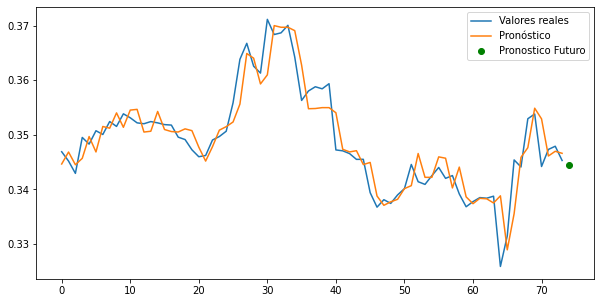

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y.values[-74:], label='Valores reales')
plt.plot(pickled_model.predict(x)[-74:], label='Pronóstico')
plt.scatter(x=74,
            y=pickled_model.predict(pd.concat([final.iloc[-1:,0:5], x.iloc[-1:,0:-5]], axis=1).values),
           color='green', label='Pronostico Futuro')
plt.legend()

<AxesSubplot:xlabel='imp', ylabel='f'>

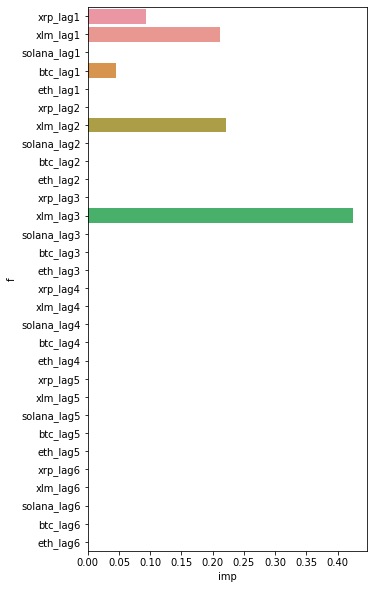

In [78]:
plt.figure(figsize=(5,10))
sns.barplot(y=pd.DataFrame(zip(x.columns.values,pickled_model.feature_importances_), columns=['f', 'imp'])['f'], x=pd.DataFrame(zip(x.columns.values,pickled_model.feature_importances_), columns=['f', 'imp'])['imp'])